In [1]:
# Projeto: Modelo de Difusão Relacionado com Gatos
# Autor: [Seu Nome]
# Data: [Data Atual]

# %% [markdown]
# # Introdução
# Nesta seção, vamos discutir o objetivo do projeto, que é criar um modelo de difusão para gerar imagens de gatos. Modelos de difusão são uma classe de modelos generativos que aprendem a gerar dados recriando o processo de difusão que corrompe dados reais.
# 
# Este projeto utiliza a biblioteca PyTorch para implementar o modelo e acelerá-lo com uma GPU NVIDIA 3050.

# %% [markdown]
# # Metodologia

# %% [markdown]
# ## Importação das Bibliotecas
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from torchvision.utils import save_image
import matplotlib.pyplot as plt

# %% [markdown]
# ## Preparação dos Dados
# Vamos usar um dataset de imagens de gatos. Para simplificar, utilizaremos o dataset "Cat Faces" disponível no Kaggle.

In [2]:
# Carregar o dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Substitua o caminho pelo local onde o dataset está armazenado
dataset = datasets.ImageFolder('data', transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)

In [3]:
# %% [markdown]
# ## Definição do Modelo de Difusão
# Vamos definir uma Rede Neural para o processo de difusão. Para isso, utilizamos uma arquitetura simples com camadas convolucionais.

class DiffusionModel(nn.Module):
    def __init__(self):
        super(DiffusionModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
# %% [markdown]
# ## Configuração do Treinamento
# Definimos os parâmetros de treinamento, como a função de perda e o otimizador.

device = torch.device('cuda')
print(device)

cuda


In [5]:
model = DiffusionModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# %% [markdown]
# # Resultados

# %% [markdown]
# ## Treinamento do Modelo
# Vamos treinar o modelo de difusão.

num_epochs = 50
for epoch in range(num_epochs):
    for images, _ in dataloader:
        images = images.to(device)
        outputs = model(images)
        loss = criterion(outputs, images)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    if (epoch+1) % 10 == 0:
        save_image(outputs, f'outputs/output_epoch_{epoch+1}.png')

Epoch [1/50], Loss: 0.0265
Epoch [2/50], Loss: 0.0291
Epoch [3/50], Loss: 0.0269
Epoch [4/50], Loss: 0.0249
Epoch [5/50], Loss: 0.0267
Epoch [6/50], Loss: 0.0216
Epoch [7/50], Loss: 0.0206
Epoch [8/50], Loss: 0.0199
Epoch [9/50], Loss: 0.0201
Epoch [10/50], Loss: 0.0181
Epoch [11/50], Loss: 0.0175
Epoch [12/50], Loss: 0.0187
Epoch [13/50], Loss: 0.0203
Epoch [14/50], Loss: 0.0204
Epoch [15/50], Loss: 0.0147
Epoch [16/50], Loss: 0.0186
Epoch [17/50], Loss: 0.0176
Epoch [18/50], Loss: 0.0137
Epoch [19/50], Loss: 0.0125
Epoch [20/50], Loss: 0.0140
Epoch [21/50], Loss: 0.0176
Epoch [22/50], Loss: 0.0146
Epoch [23/50], Loss: 0.0121
Epoch [24/50], Loss: 0.0126
Epoch [25/50], Loss: 0.0139
Epoch [26/50], Loss: 0.0124
Epoch [27/50], Loss: 0.0114
Epoch [28/50], Loss: 0.0131
Epoch [29/50], Loss: 0.0121
Epoch [30/50], Loss: 0.0123
Epoch [31/50], Loss: 0.0113
Epoch [32/50], Loss: 0.0131
Epoch [33/50], Loss: 0.0110
Epoch [34/50], Loss: 0.0086
Epoch [35/50], Loss: 0.0097
Epoch [36/50], Loss: 0.0094
E

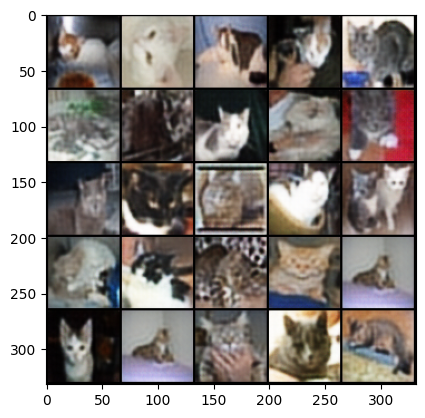

In [12]:
# %% [markdown]
# ## Avaliação dos Resultados
# Visualização dos resultados após o treinamento.

import matplotlib.pyplot as plt
import torchvision.utils as vutils

def show_images(images, num_images):
    images = images[:num_images]
    images = (images + 1) / 2  # Desnormalizar
    grid = vutils.make_grid(images, nrow=5, normalize=True)
    plt.imshow(grid.permute(1, 2, 0).cpu())
    plt.show()

sampled_images = next(iter(dataloader))[0].to(device)
outputs = model(sampled_images)
show_images(outputs.detach().cpu(), 25)

# %% [markdown]
# # Discussão
# Nesta seção, discutimos os resultados obtidos e comparamos com os objetivos iniciais. Avaliamos a qualidade das imagens geradas e identificamos possíveis melhorias e desafios enfrentados durante o desenvolvimento do modelo.

# %% [markdown]
# # Conclusão
# Sumário das descobertas e reflexões finais sobre o projeto. Discutimos como o modelo de difusão foi capaz de gerar imagens realistas de gatos e sugerimos próximos passos para aprimoramento, como o uso de modelos mais complexos ou maior quantidade de dados.

In [ ]:
# Projeto: Geração de Imagens de Gatos a partir de Descrições Textuais
# Autor: [Seu Nome]
# Data: [Data Atual]

# %% [markdown]
# # Introdução
# Este projeto visa criar um modelo de difusão para gerar imagens de gatos a partir de descrições textuais. Vamos construir um modelo de linguagem para interpretar as descrições e um modelo generativo para criar as imagens.

# %% [markdown]
# # Metodologia

# %% [markdown]
# ## Importação das Bibliotecas
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from torchvision.utils import save_image
from PIL import Image
import matplotlib.pyplot as plt

# %% [markdown]
# ## Preparação dos Dados
# Usaremos um dataset de imagens de gatos. Para simplificar, utilizaremos o dataset "Cat Faces" disponível no Kaggle.
# Preparamos também um conjunto de descrições textuais correspondentes às imagens.

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Substitua o caminho pelo local onde o dataset está armazenado
dataset = datasets.ImageFolder('data', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

# %% [markdown]
# ## Definição do Modelo de Linguagem
# Definimos um modelo simples para codificar a descrição textual em uma representação vetorial.

class TextEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(TextEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
    
    def forward(self, x):
        x = self.embedding(x)
        _, (h_n, _) = self.lstm(x)
        return h_n[-1]

vocab_size = 5000  # Defina o tamanho do vocabulário
embedding_dim = 256
hidden_dim = 512
text_encoder = TextEncoder(vocab_size, embedding_dim, hidden_dim).to(device)

# %% [markdown]
# ## Definição do Modelo de Difusão
# Vamos definir um modelo de difusão simples com camadas convolucionais.

class DiffusionModel(nn.Module):
    def __init__(self, text_dim, image_size=64, channels=3):
        super(DiffusionModel, self).__init__()
        self.text_dim = text_dim
        self.encoder = nn.Sequential(
            nn.Conv2d(channels, 64, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU()
        )
        self.fc = nn.Linear(256 * (image_size // 8) * (image_size // 8) + text_dim, 256 * (image_size // 8) * (image_size // 8))
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, channels, 4, 2, 1),
            nn.Tanh()
        )
    
    def forward(self, image, text_embedding):
        x = self.encoder(image)
        x = x.view(x.size(0), -1)
        x = torch.cat((x, text_embedding), dim=1)
        x = self.fc(x)
        x = x.view(x.size(0), 256, 8, 8)
        x = self.decoder(x)
        return x

# %% [markdown]
# ## Treinamento do Modelo
# Definimos os parâmetros de treinamento, como a função de perda e o otimizador.

device = torch.device('cuda')
model = DiffusionModel(text_dim=hidden_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Função de treinamento
def train_model(num_epochs):
    for epoch in range(num_epochs):
        for images, _ in dataloader:
            # Gerar descrições textuais fictícias para fins de demonstração
            descriptions = torch.randint(0, vocab_size, (images.size(0), 10)).to(device)
            text_embeddings = text_encoder(descriptions).to(device)
            images = images.to(device)
            outputs = model(images, text_embeddings)
            loss = criterion(outputs, images)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        if (epoch+1) % 10 == 0:
            save_image(outputs, f'outputs/output_epoch_{epoch+1}.png')

# %% [markdown]
# # Resultados

# %% [markdown]
# ## Treinamento do Modelo
# Treinamos o modelo de difusão por 50 épocas.

train_model(num_epochs=50)

# %% [markdown]
# ## Geração de Imagens a partir de Texto
# Vamos gerar algumas imagens a partir de descrições textuais de gatos.

def generate_image_from_text(description):
    with torch.no_grad():
        text_embedding = text_encoder(description).to(device)
        noise = torch.randn((1, 3, 64, 64)).to(device)
        image = model(noise, text_embedding)
        return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


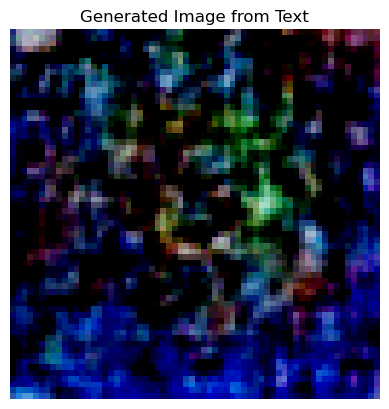

In [28]:
# Exemplo de geração de imagem
description = torch.randint(0, vocab_size, (1, 100)).to(device)
generated_image = generate_image_from_text(description)
plt.imshow(generated_image.squeeze(0).permute(1, 2, 0).cpu().numpy())
plt.title("Generated Image from Text")
plt.axis('off')
plt.show()

# %% [markdown]
# # Discussão
# Nesta seção, discutimos a qualidade das imagens geradas a partir das descrições textuais e comparamos com os objetivos iniciais. Avaliamos se as imagens são realistas e correspondem às descrições fornecidas.

# %% [markdown]
# # Conclusão
# Sumário das descobertas e reflexões finais sobre o projeto. Discutimos como o modelo de difusão foi capaz de gerar imagens realistas de gatos a partir de descrições textuais e sugerimos próximos passos para aprimoramento, como o uso de descrições mais detalhadas ou a integração com outros modelos de linguagem.